### 1. Install required libraries

In [1]:
# install.packages("remotes")
# remotes::install_github("zdk123/SpiecEasi")
# if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
# install.packages("GGally")

### 2. Load required libraries

In [2]:
library(phyloseq)
library(SpiecEasi)
library(igraph)
library(intergraph)
library(network)
library(GGally)


Attaching package: ‘igraph’


The following object is masked from ‘package:SpiecEasi’:

    make_graph


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



‘network’ 1.17.1 (2021-06-12), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



Attaching package: ‘network’


The following objects are masked from ‘package:igraph’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



### 3. Load R objects from diversity analyses

In [3]:
load("../02-diversity_analyses/.RData")

### 4. ASV interaction network

#### 4a. First subset phyloseq object into different tooth type / HIV status groups

In [4]:
ps.dat.noUS <- subset_samples(ps.dat, study_group != "US")
# subset phyloseq object into different groups
## HI CF-PF
ps.dat.HI.CFPF <- subset_samples(ps.dat.noUS, study_group == "HI" & aliquot_type == "CF-PF")
# filter low abundance taxa to simplify network building step (seen at least 3 times in 10% of samples)
ps.dat.HI.CFPF <- filter_taxa(ps.dat.HI.CFPF, function(x) sum(x > 3) > (0.10*length(x)), TRUE)
                              
## HI CA-PD                              
ps.dat.HI.CAPD <- subset_samples(ps.dat.noUS, study_group == "HI" & aliquot_type == "CA-PD")
ps.dat.HI.CAPD <- filter_taxa(ps.dat.HI.CAPD , function(x) sum(x > 3) > (0.10*length(x)), TRUE)
                              
## HUU CF-PF                              
ps.dat.HUU.CFPF <- subset_samples(ps.dat.noUS, study_group == "HUU" & aliquot_type == "CF-PF")
ps.dat.HUU.CFPF <- filter_taxa(ps.dat.HUU.CFPF, function(x) sum(x > 3) > (0.10*length(x)), TRUE)
                               
## HUU CA-PD                               
ps.dat.HUU.CAPD <- subset_samples(ps.dat.noUS, study_group == "HUU" & aliquot_type == "CA-PD")
ps.dat.HUU.CAPD <- filter_taxa(ps.dat.HUU.CAPD, function(x) sum(x > 3) > (0.10*length(x)), TRUE)
                               
## HEU CF-PF                               
ps.dat.HEU.CFPF <- subset_samples(ps.dat.noUS, study_group == "HEU" & aliquot_type == "CF-PF")
ps.dat.HEU.CFPF <- filter_taxa(ps.dat.HEU.CFPF, function(x) sum(x > 3) > (0.10*length(x)), TRUE)
                               
## HEU CA-PD                               
ps.dat.HEU.CAPD <- subset_samples(ps.dat.noUS, study_group == "HEU" & aliquot_type == "CA-PD")
ps.dat.HEU.CAPD <- filter_taxa(ps.dat.HEU.CAPD, function(x) sum(x > 3) > (0.10*length(x)), TRUE)
                               
## HI CA-PE                               
ps.dat.HI.CAPE <- subset_samples(ps.dat.noUS, study_group == "HI" & aliquot_type == "CA-PE")
ps.dat.HI.CAPE <- filter_taxa(ps.dat.HI.CAPE, function(x) sum(x > 3) > (0.10*length(x)), TRUE)

## HUU CA-PE                              
ps.dat.HUU.CAPE <- subset_samples(ps.dat.noUS, study_group == "HUU" & aliquot_type == "CA-PE")
ps.dat.HUU.CAPE <- filter_taxa(ps.dat.HUU.CAPE, function(x) sum(x > 3) > (0.10*length(x)), TRUE)

## HEU CA-PE    
# had to increase filter to 25% of samples or too many ASVs to calculate (crashes R)
# network interpretation to be taken with a grain of salt as n is very small 
ps.dat.HEU.CAPE <- subset_samples(ps.dat.noUS, study_group == "HEU" & aliquot_type == "CA-PE")
ps.dat.HEU.CAPE <- filter_taxa(ps.dat.HEU.CAPE, function(x) sum(x > 3) > (0.25*length(x)), TRUE)

#### 4b. HI CF-PF network

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  143"

pdf 
  2

[1] "number of positive connections:  96"

[1] "number of negative connections:  6"

[1] "total number of connections:  102"

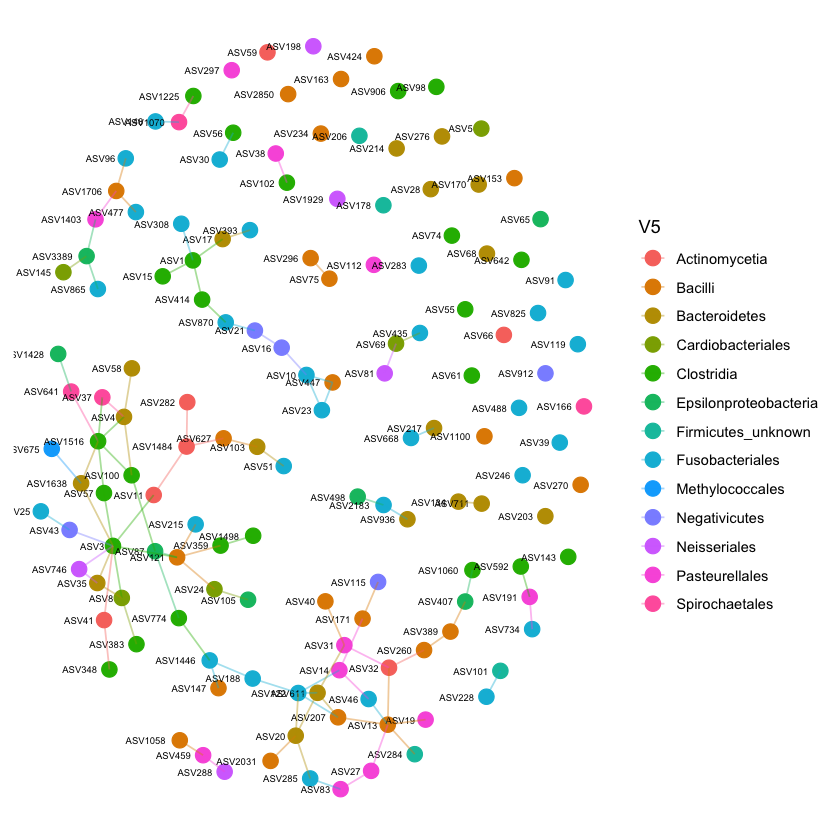

In [5]:
# make image folder
system("mkdir img")
spiec.out <- spiec.easi(ps.dat.HI.CFPF, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HI.CFPF)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HI.CFPF)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HI.CFPF, type='taxa', color="V5")
grph
pdf("img/network.HI.CFPF.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)

Visualize network with positive and negative edges

pdf 
  2

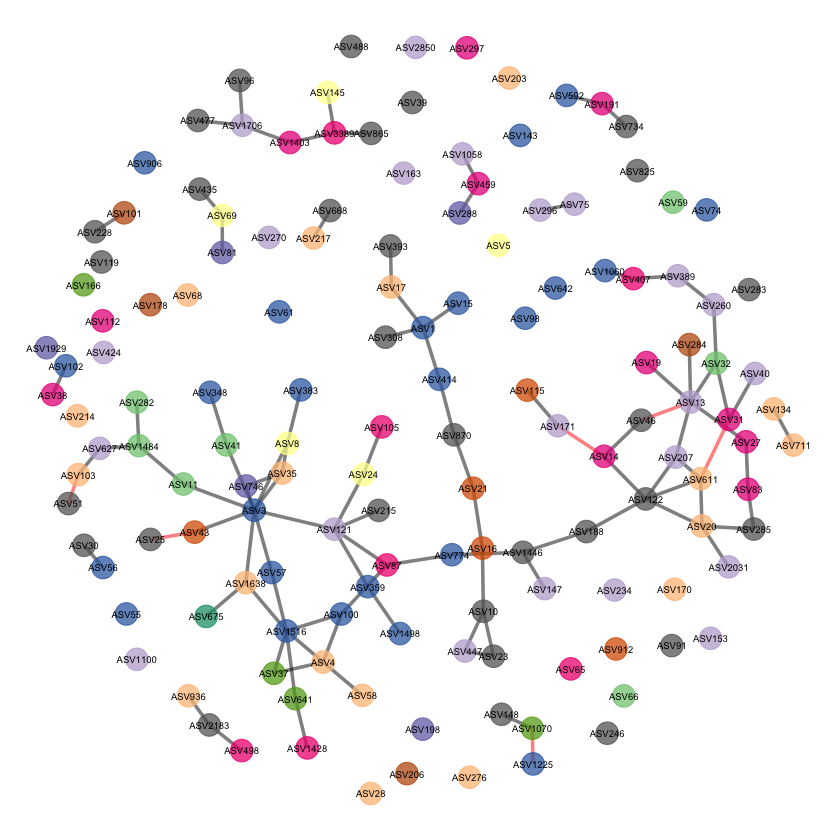

In [6]:
getrank <- "V5"
# Col vector up to 74 color samples
col_vector74 = c("#7FC97F","#BEAED4","#FDC086","#FFFF99","#386CB0","#F0027F","#BF5B17","#666666","#1B9E77","#D95F02","#7570B3","#E7298A","#66A61E","#E6AB02","#A6761D","#666666","#A6CEE3","#1F78B4","#B2DF8A","#33A02C","#FB9A99","#E31A1C","#FDBF6F","#FF7F00","#CAB2D6","#6A3D9A","#FFFF99","#B15928","#FBB4AE","#B3CDE3","#CCEBC5","#DECBE4","#FED9A6","#FFFFCC","#E5D8BD","#FDDAEC","#F2F2F2","#B3E2CD","#FDCDAC","#CBD5E8","#F4CAE4","#E6F5C9","#FFF2AE","#F1E2CC","#CCCCCC","#E41A1C","#377EB8","#4DAF4A","#984EA3","#FF7F00","#FFFF33","#A65628","#F781BF","#999999","#66C2A5","#FC8D62","#8DA0CB","#E78AC3","#A6D854","#FFD92F","#E5C494","#B3B3B3","#8DD3C7","#FFFFB3","#BEBADA","#FB8072","#80B1D3","#FDB462","#B3DE69","#FCCDE5","#D9D9D9","#BC80BD","#CCEBC5","#FFED6F")
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HI.CFPF_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HI.CFPF.txt", format="ncol")

K-core decomposition

In [7]:
# which ASVs are the core of the network 
which(coreness(spiec.graph)>=2)

ASV8   ASV87   ASV37  ASV100   ASV10   ASV23  ASV285 ASV1446  ASV188   ASV46 
      3       7      15      16      30      34      36      45      46      47 
 ASV122  ASV207  ASV447  ASV121   ASV13  ASV774    ASV3 ASV1516   ASV57   ASV32 
     48      53      54      64      67      74      87      88      89     104 
 ASV746   ASV83   ASV31   ASV14   ASV27   ASV35   ASV20  ASV611    ASV4 ASV1638 
    111     116     120     122     123     125     131     136     138     143

In [8]:
# periphery of the network
which(coreness(spiec.graph)==0)

ASV5   ASV65  ASV166   ASV74   ASV61  ASV825  ASV119   ASV39   ASV91  ASV488 
      5       6      14      17      18      21      25      27      38      42 
 ASV283  ASV246 ASV1100  ASV163  ASV234  ASV153  ASV424  ASV270 ASV2850  ASV906 
     43      44      52      57      58      60      63      65      70      71 
 ASV178  ASV206   ASV98   ASV55  ASV143  ASV642  ASV912   ASV66   ASV59  ASV198 
     79      80      81      85      91      92      98     106     107     108 
ASV1929  ASV297  ASV112  ASV276  ASV214  ASV170  ASV203   ASV68   ASV28 
    112     114     117     129     130     134     135     140     141

Eigenvector centrality

In [9]:
# measure of being well connected to the well connected -- influence of a node in a network - high eigenvector score means that a node is connected to many nodes who themselves have high scores
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HICFPF <- spiec.graph

ASV11      ASV4     ASV57    ASV746    ASV121   ASV1638      ASV8   ASV1516 
0.3044380 0.3064036 0.4177174 0.4202641 0.4461196 0.4523480 0.4551059 0.5096925 
    ASV35      ASV3 
0.5188968 1.0000000

#### 4c. HUU CF-PF network

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  164"

pdf 
  2

[1] "number of positive connections:  181"

[1] "number of negative connections:  8"

[1] "total number of connections:  189"

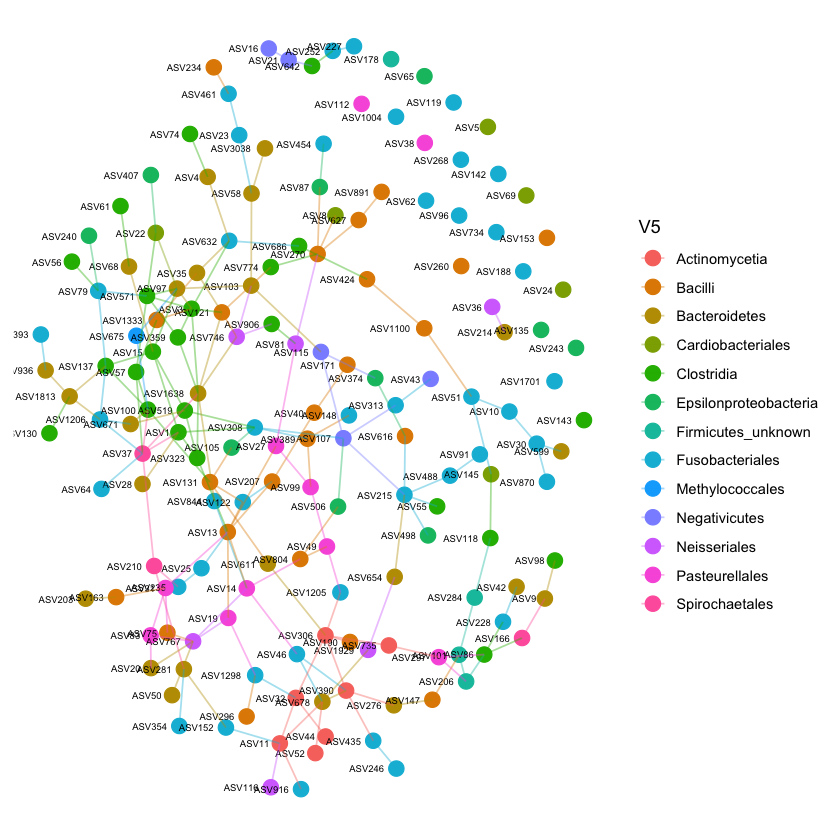

In [10]:
spiec.out <- spiec.easi(ps.dat.HUU.CFPF, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HUU.CFPF)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HUU.CFPF)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HUU.CFPF, type='taxa', color="V5")
grph
pdf("img/network.HUU.CFPF.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)

Visualize network with positive and negative edges

pdf 
  2

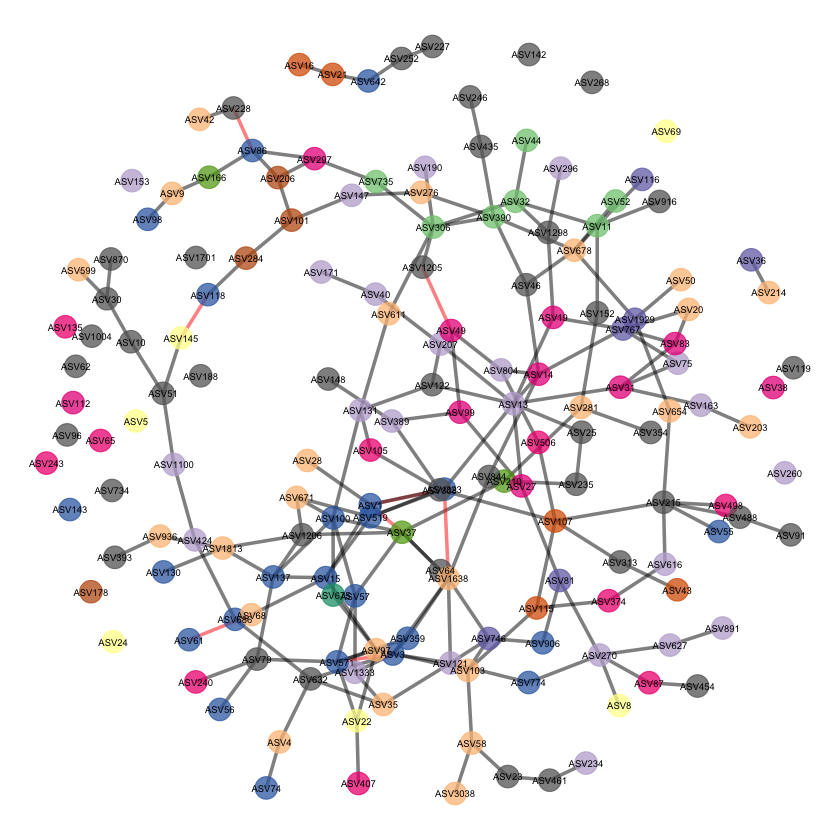

In [11]:
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HUU.CFPF_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HUU.CFPF.txt", format="ncol")

K-core decomposition

In [12]:
# which ASVs are the core of the network 
which(coreness(spiec.graph)>=2)

ASV145   ASV22  ASV506  ASV105  ASV374  ASV210   ASV37 ASV1333  ASV137  ASV571 
      2       6       8      10      15      18      19      20      21      22 
 ASV100  ASV323  ASV519  ASV152   ASV79   ASV51   ASV25 ASV1298 ASV1205  ASV215 
     23      24      25      35      40      42      45      48      49      51 
 ASV308 ASV1206  ASV235  ASV844   ASV46  ASV122  ASV632  ASV389 ASV1100  ASV207 
     52      54      63      64      68      69      70      72      74      75 
 ASV804   ASV75  ASV131  ASV147  ASV424  ASV121  ASV270  ASV616   ASV13  ASV906 
     76      78      82      86      87      88      89      90      91      93 
 ASV774  ASV101  ASV284  ASV206   ASV86  ASV118  ASV686    ASV3   ASV57    ASV1 
     94      95      96      98     100     101     102     105     106     107 
 ASV359  ASV115  ASV107   ASV15   ASV32   ASV11  ASV735  ASV390  ASV306  ASV767 
    110     114     115     116     117     119     121     122     123     124 
  ASV81  ASV746 ASV1929  ASV297   ASV83   ASV19   ASV31   ASV14   ASV49   ASV27 
    127     128     129     130     131     134     135     136     137     138 
  ASV99  ASV675   ASV35  ASV276   ASV20  ASV678  ASV103   ASV97  ASV281  ASV611 
    139     140     141     143     145     146     147     148     150     152 
 ASV671 ASV1813  ASV654 ASV1638 
    157     158     160     164

In [13]:
# periphery of the network
which(coreness(spiec.graph)==0)

ASV69   ASV24    ASV5   ASV65  ASV135  ASV243  ASV734  ASV142  ASV119 ASV1004 
      1       4       5       7      12      13      29      33      36      38 
ASV1701   ASV62   ASV96  ASV268  ASV188  ASV153  ASV260  ASV178  ASV143  ASV112 
     39      41      58      62      67      85      92      97     108     132 
  ASV38 
    133

Eigenvector centrality

In [14]:
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HUUCFPF <- spiec.graph

ASV15    ASV100     ASV57    ASV359    ASV121     ASV37     ASV97    ASV571 
0.4450517 0.5454526 0.5582131 0.6121564 0.6371656 0.7093523 0.7190643 0.8011219 
  ASV1638      ASV3 
0.9158725 1.0000000

#### 4d. HEU CF-PF network

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  156"

pdf 
  2

[1] "number of positive connections:  106"

[1] "number of negative connections:  4"

[1] "total number of connections:  110"

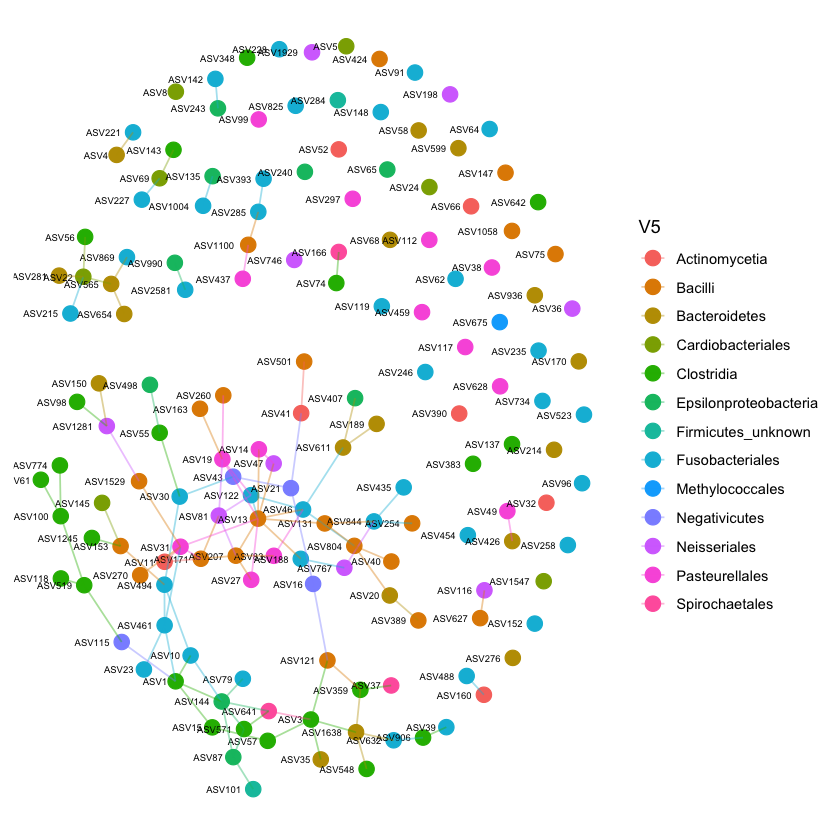

In [15]:
spiec.out <- spiec.easi(ps.dat.HEU.CFPF, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HEU.CFPF)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HEU.CFPF)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HEU.CFPF, type='taxa', color="V5")
grph
pdf("img/network.HEU.CFPF.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)

Visualize network with positive and negative edges

pdf 
  2

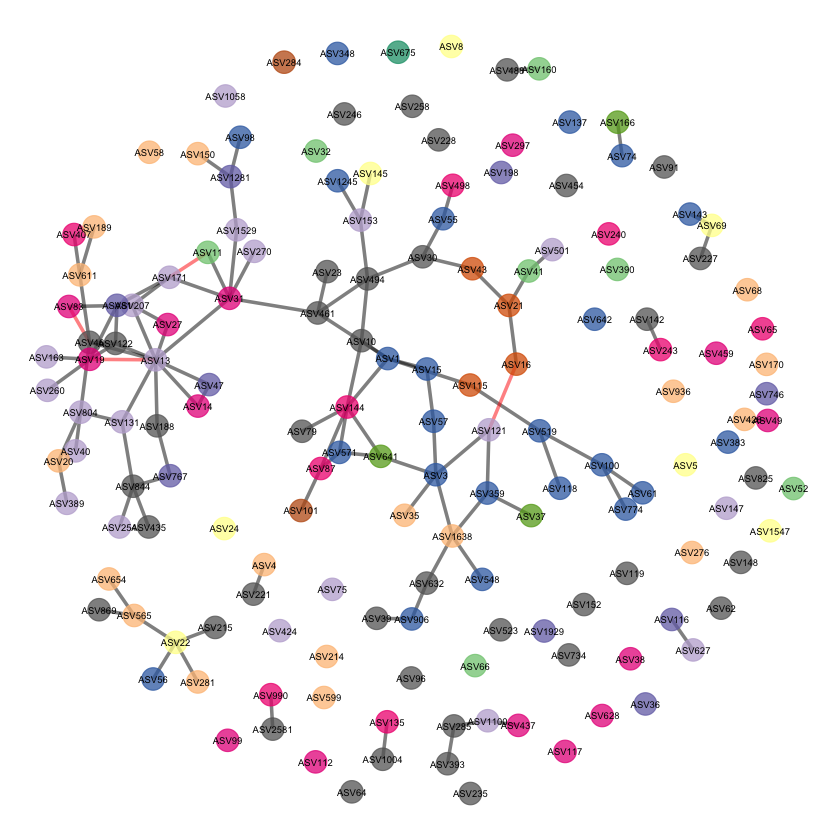

In [16]:
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HEU.CFPF_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HEU.CFPF.txt", format="ncol")

K-core decomposition

In [17]:
# which ASVs are the core of the network 
which(coreness(spiec.graph)>=2)

ASV87  ASV144  ASV641  ASV571  ASV494  ASV461   ASV10   ASV30  ASV844  ASV188 
      9      15      17      21      40      41      42      43      56      60 
  ASV46  ASV122  ASV171  ASV207  ASV804  ASV131  ASV121   ASV13    ASV3   ASV57 
     61      62      65      67      68      74      81      83      97      98 
   ASV1  ASV359   ASV16   ASV21   ASV43   ASV15   ASV11  ASV767   ASV47   ASV81 
     99     102     103     104     105     107     112     115     119     120 
  ASV83   ASV19   ASV31   ASV14   ASV27 ASV1638 
    128     131     132     134     136     156

In [18]:
# periphery of the network
which(coreness(spiec.graph)==0)

ASV8   ASV24    ASV5 ASV1547   ASV65  ASV240  ASV137  ASV734  ASV228  ASV825 
      3       4       5       7       8      16      20      26      27      28 
 ASV152  ASV119  ASV148   ASV62   ASV91   ASV96  ASV454  ASV258  ASV235  ASV246 
     33      34      35      38      48      49      53      54      55      57 
  ASV64  ASV523   ASV75 ASV1058  ASV147  ASV424  ASV383  ASV284  ASV348  ASV642 
     58      59      70      78      79      80      87      89      94     101 
  ASV32   ASV52   ASV66  ASV390   ASV36  ASV198  ASV746 ASV1929  ASV628  ASV117 
    109     111     113     114     116     117     122     123     124     125 
 ASV297  ASV112   ASV38  ASV459   ASV99  ASV675  ASV936  ASV276  ASV214  ASV170 
    126     129     130     133     137     138     140     141     142     147 
 ASV599   ASV58   ASV68 
    152     154     155

Eigenvector centrality

In [19]:
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HEUCFPF <- spiec.graph

ASV131     ASV27    ASV171     ASV31     ASV81     ASV46     ASV19    ASV207 
0.3086188 0.3732333 0.4139391 0.4628563 0.5063898 0.5180755 0.5533244 0.5969495 
   ASV122     ASV13 
0.6024717 1.0000000

#### 4e. HI CA-PD network

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  168"

pdf 
  2

[1] "number of positive connections:  215"

[1] "number of negative connections:  2"

[1] "total number of connections:  217"

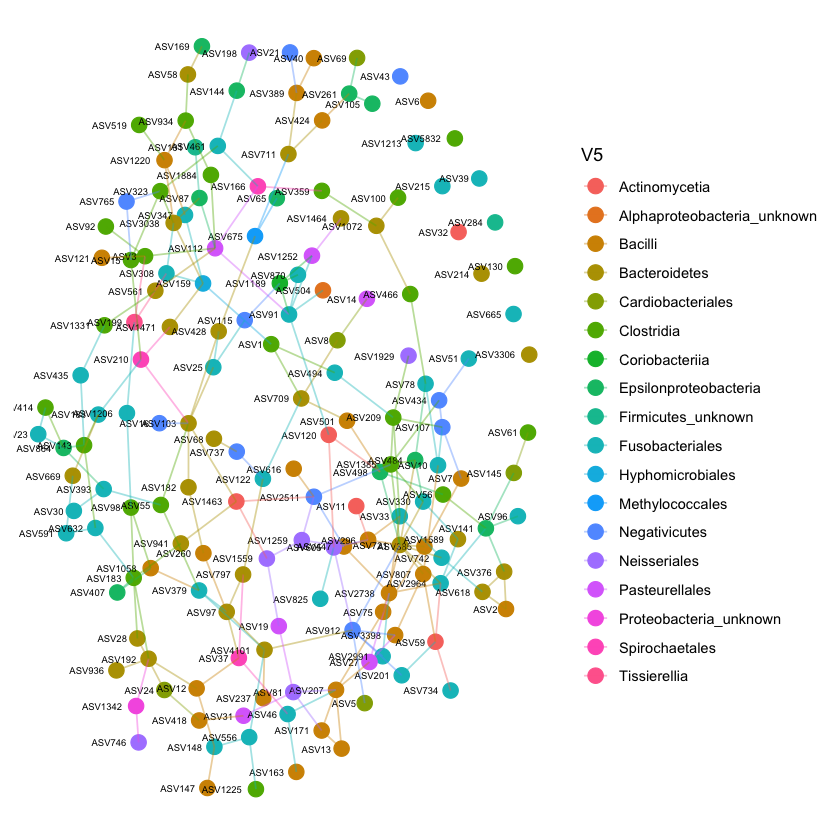

pdf 
  2

ASV24   ASV87  ASV407  ASV141  ASV498  ASV484  ASV864  ASV166  ASV210   ASV37 
      5       8      10      11      12      16      17      18      19      20 
 ASV183 ASV1884  ASV323  ASV466  ASV435  ASV870  ASV201  ASV556  ASV393  ASV148 
     21      23      24      29      32      33      34      35      36      37 
  ASV78  ASV742   ASV33  ASV494  ASV461   ASV25   ASV10  ASV330 ASV2964 ASV2991 
     38      41      42      43      44      45      46      48      49      50 
 ASV308   ASV23  ASV347 ASV1206  ASV591  ASV379   ASV91  ASV188   ASV46  ASV122 
     52      53      54      55      56      58      59      62      63      64 
 ASV632 ASV2738  ASV418  ASV296  ASV171    ASV7   ASV12    ASV2  ASV207 ASV3398 
     65      66      67      68      70      71      72      74      75      76 
 ASV447   ASV75  ASV501  ASV385  ASV807 ASV1058 ASV1220   ASV13  ASV260  ASV199 
     77      78      80      83      84      85      86      91      92      93 
  ASV98   ASV56   ASV55  ASV414 ASV1331    ASV3    ASV1  ASV143  ASV359  ASV765 
     97      98      99     100     101     102     103     104     106     109 
 ASV912  ASV115  ASV434  ASV159 ASV2511  ASV107   ASV15  ASV934  ASV209 ASV1385 
    111     112     113     116     117     118     119     120     121     122 
ASV1189 ASV1463   ASV59  ASV120 ASV1559 ASV1259  ASV605   ASV81  ASV112   ASV19 
    123     124     127     128     129     130     132     133     136     137 
  ASV31 ASV1252   ASV27 ASV1589  ASV376  ASV103   ASV97  ASV721  ASV618  ASV709 
    138     139     141     146     147     148     149     150     151     152 
 ASV941 ASV1471 ASV3038 ASV4101 ASV1072   ASV28  ASV669  ASV192  ASV428  ASV182 
    153     154     155     156     157     160     161     164     165     166 
 ASV561  ASV797 
    167     168

ASV130   ASV39  ASV215 ASV1213  ASV665    ASV6 ASV5832  ASV284   ASV43   ASV32 
     27      39      51      57      60      73      94      96     110     125 
 ASV214 ASV3306 
    145     162

ASV385     ASV75    ASV807    ASV296   ASV2964    ASV912    ASV484    ASV330 
0.3200605 0.3277798 0.3499953 0.4085132 0.4088698 0.4417009 0.5080121 0.5175875 
  ASV1385    ASV721 
0.6034135 1.0000000

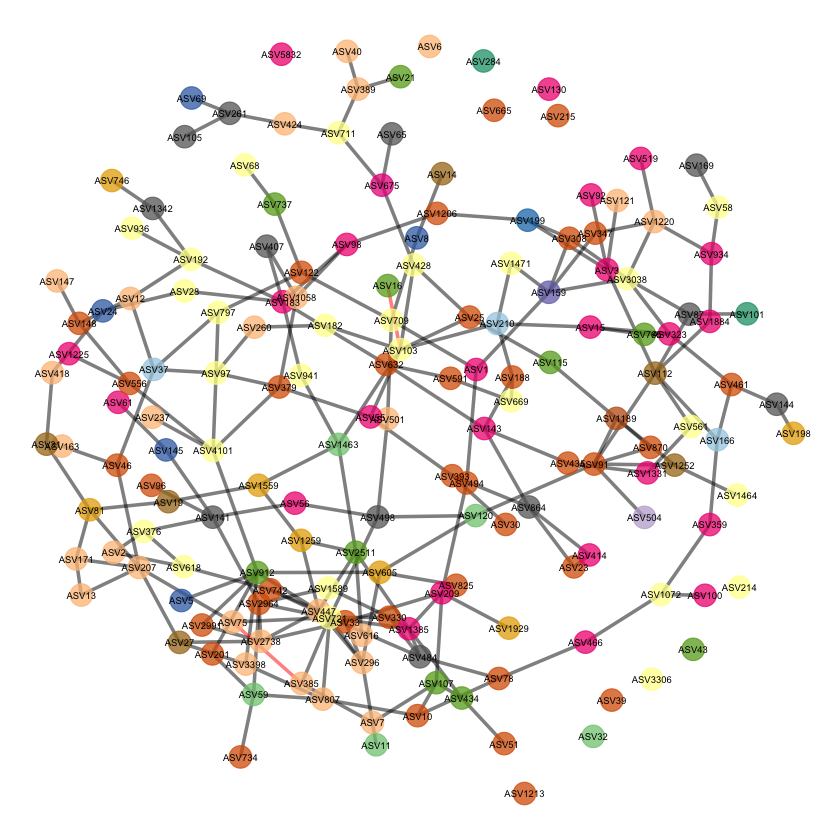

In [20]:
spiec.out <- spiec.easi(ps.dat.HI.CAPD, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HI.CAPD)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HI.CAPD)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HI.CAPD, type='taxa', color="V5")
grph
pdf("img/network.HI.CAPD.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)
# visualize network with pos and neg connections
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HI.CAPD_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HI.CAPD.txt", format="ncol")

# kcore decomp
which(coreness(spiec.graph)>=2)
which(coreness(spiec.graph)==0)

# eigenvalue centrality
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HICAPD <- spiec.graph

#### 4f. HUU CA-PD network

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  270"

pdf 
  2

[1] "number of positive connections:  761"

[1] "number of negative connections:  50"

[1] "total number of connections:  811"

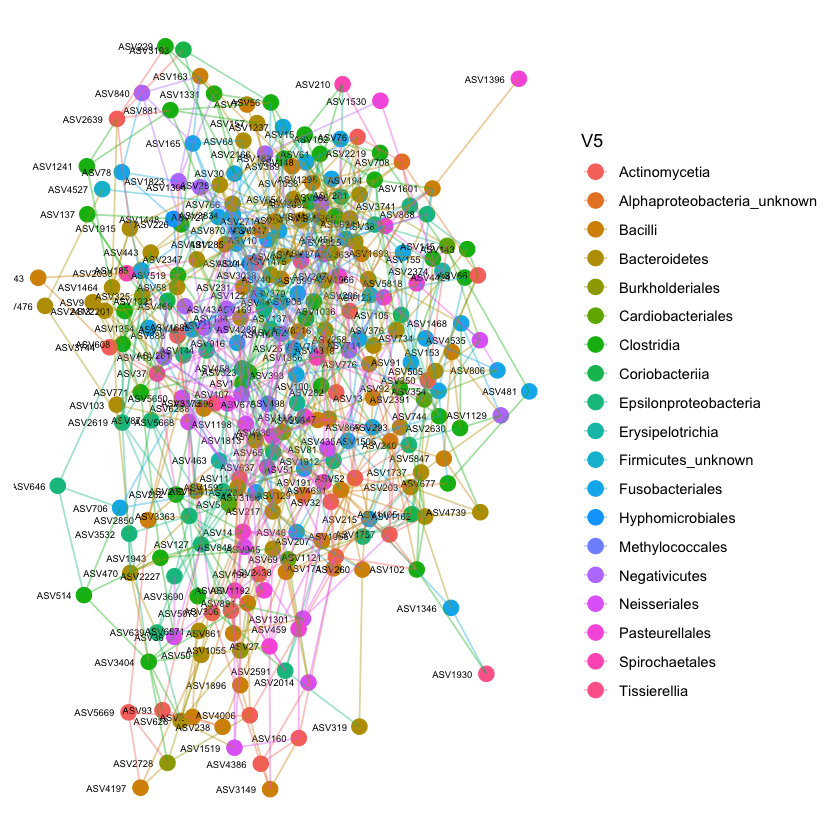

pdf 
  2

ASV129 ASV5073   ASV69  ASV145 ASV2391    ASV5   ASV65   ASV87  ASV105 ASV1541 
      1       2       3       4       5       6       7       8       9      10 
 ASV127  ASV639 ASV3363 ASV1912 ASV1065  ASV498 ASV4280 ASV3532  ASV144  ASV646 
     11      12      13      14      15      16      17      18      19      20 
ASV2591  ASV685 ASV6341  ASV169  ASV261  ASV868 ASV2619 ASV2227  ASV240 ASV4668 
     21      22      23      24      25      26      27      28      29      30 
ASV1356 ASV1475 ASV2030  ASV210   ASV37 ASV4527 ASV1232  ASV771  ASV137  ASV183 
     31      32      33      34      35      36      37      38      39      40 
ASV1241  ASV100  ASV323 ASV4424  ASV519   ASV92   ASV61  ASV514  ASV427 ASV1371 
     41      42      43      44      45      46      47      48      49      50 
 ASV734  ASV435  ASV706  ASV870  ASV393  ASV152  ASV148 ASV3834 ASV1468  ASV165 
     51      52      53      54      55      56      57      58      59      60 
  ASV78   ASV51 ASV1237   ASV25   ASV10   ASV30  ASV185 ASV1298  ASV869  ASV354 
     61      62      63      64      65      66      67      68      69      70 
 ASV806  ASV215 ASV1693 ASV1354  ASV347  ASV820 ASV1346  ASV285  ASV379   ASV91 
     71      72      73      74      75      76      77      78      79      80 
 ASV916  ASV481  ASV454  ASV258  ASV280   ASV64 ASV1446   ASV46  ASV122  ASV727 
     81      82      83      84      85      86      87      88      89      90 
ASV2374  ASV463  ASV861  ASV296  ASV389  ASV171    ASV7    ASV6    ASV2  ASV207 
     91      92      93      94      95      96      97      98      99     100 
ASV6288 ASV5847 ASV3156  ASV891   ASV75  ASV231   ASV40  ASV163 ASV4197 ASV3149 
    101     102     103     104     105     106     107     108     109     110 
ASV1896  ASV238  ASV153  ASV363 ASV1601 ASV2438 ASV1058 ASV1243  ASV147  ASV702 
    111     112     113     114     115     116     117     118     119     120 
ASV1505   ASV13 ASV4691  ASV260 ASV2850 ASV4911  ASV906 ASV3375 ASV1930 ASV2201 
    121     122     123     124     125     126     127     128     129     130 
 ASV608  ASV206  ASV744  ASV102  ASV194  ASV155   ASV56  ASV226 ASV2630 ASV1943 
    131     132     133     134     135     136     137     138     139     140 
ASV1331    ASV1  ASV143 ASV2166  ASV469 ASV1129   ASV16   ASV21   ASV43 ASV1394 
    141     142     143     144     145     146     147     148     149     150 
 ASV840 ASV1823  ASV115 ASV1448 ASV5692 ASV1688 ASV4319  ASV107  ASV881  ASV677 
    151     152     153     154     155     156     157     158     159     160 
ASV3690 ASV3404  ASV262   ASV15  ASV229  ASV458 ASV1321 ASV1405 ASV3193 ASV4006 
    161     162     163     164     165     166     167     168     169     170 
ASV3744  ASV282  ASV888 ASV1036  ASV250   ASV32  ASV160 ASV1121   ASV52   ASV11 
    171     172     173     174     175     176     177     178     179     180 
  ASV66   ASV44  ASV196 ASV5669 ASV1757 ASV4386  ASV306   ASV76   ASV93 ASV2639 
    181     182     183     184     185     186     187     188     189     190 
ASV5668 ASV1301 ASV2014   ASV36  ASV848 ASV1519   ASV81 ASV1198 ASV5650 ASV4535 
    191     192     193     194     195     196     197     198     199     200 
ASV1192  ASV123  ASV297  ASV637  ASV191  ASV112   ASV38 ASV1596 ASV1530 ASV5818 
    201     202     203     204     205     206     207     208     209     210 
  ASV19  ASV459   ASV14   ASV27   ASV99 ASV2728 ASV1055  ASV675  ASV708 ASV5860 
    211     212     213     214     215     217     218     219     220     221 
ASV4739  ASV217  ASV711 ASV6571  ASV936  ASV945  ASV319  ASV470  ASV376  ASV776 
    222     223     224     225     226     227     228     229     230     231 
 ASV103  ASV134  ASV505  ASV170   ASV50  ASV281 ASV2925  ASV203  ASV626 ASV3741 
    232     233     234     235     236     237     238     239     240     241 
   ASV4    ASV9 ASV2219  ASV325 ASV3038  ASV157 ASV1813  ASV599 ASV1592 ASV2711 
    242     243     244     245 

named integer(0)

ASV376     ASV38    ASV170    ASV498    ASV169    ASV820    ASV454    ASV393 
0.6089284 0.6094299 0.6416517 0.6598686 0.6768347 0.7403637 0.7613259 0.7855973 
  ASV2925    ASV702 
0.9771198 1.0000000

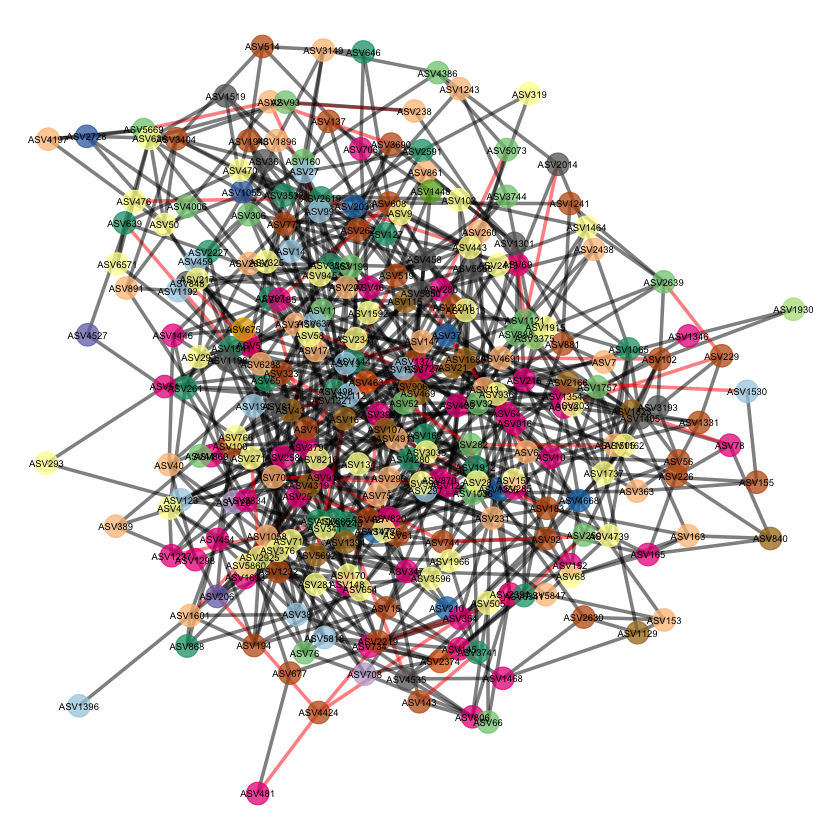

In [21]:
spiec.out <- spiec.easi(ps.dat.HUU.CAPD, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HUU.CAPD)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HUU.CAPD)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HUU.CAPD, type='taxa', color="V5")
grph
pdf("img/network.HUU.CAPD.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)
# visualize network with pos and neg connections
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HUU.CAPD_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HUU.CAPD.txt", format="ncol")

# kcore decomp
which(coreness(spiec.graph)>=2)
which(coreness(spiec.graph)==0)

# eigenvalue centrality
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HUUCAPD <- spiec.graph

#### 4g. HEU CA-PD network

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  408"

pdf 
  2

[1] "number of positive connections:  1829"

[1] "number of negative connections:  189"

[1] "total number of connections:  2018"

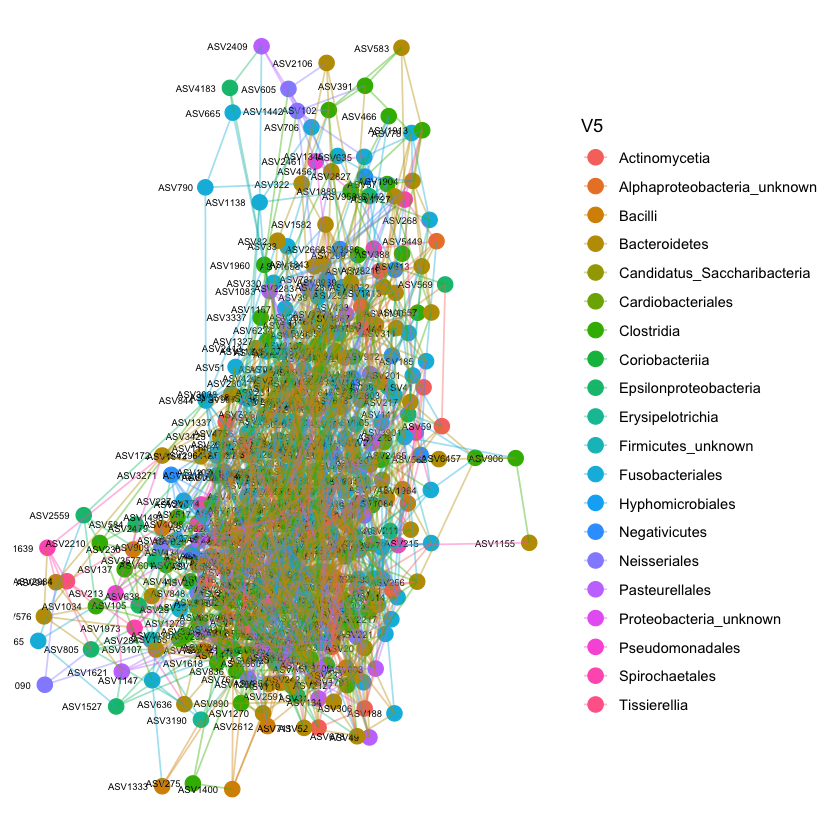

pdf 
  2

ASV129 ASV4867   ASV69  ASV145    ASV8   ASV24    ASV5   ASV22 ASV4979   ASV65 
      1       2       3       4       5       6       7       8       9      10 
  ASV87  ASV105  ASV584 ASV1146 ASV1667  ASV958  ASV338  ASV141 ASV1065  ASV569 
     11      12      13      14      15      16      17      18      19      20 
 ASV498 ASV3359  ASV374 ASV4183 ASV3518 ASV2591 ASV1527 ASV2559  ASV998  ASV805 
     21      22      23      24      25      26      27      28      29      30 
 ASV952  ASV240 ASV1096 ASV5449 ASV3586 ASV4098 ASV5508  ASV779  ASV641 ASV1973 
     31      32      33      34      35      36      37      38      39      40 
ASV3901 ASV1639  ASV166 ASV2002  ASV210 ASV1727   ASV37 ASV5881 ASV5088 ASV1358 
     41      42      43      44      45      46      47      48      49      50 
ASV1333 ASV1023 ASV2500  ASV836  ASV137  ASV183 ASV3168  ASV100  ASV890 ASV6927 
     51      52      53      54      55      56      57      58      59      60 
ASV1884  ASV601  ASV323  ASV519 ASV1033   ASV92  ASV130   ASV61 ASV2167 ASV2479 
     61      62      63      64      65      66      67      68      69      70 
 ASV466  ASV230  ASV734  ASV228 ASV3730 ASV3029  ASV435 ASV2217  ASV706  ASV201 
     71      72      73      74      75      76      77      78      79      80 
 ASV393  ASV152 ASV3555  ASV119  ASV148 ASV2818 ASV3065 ASV1069 ASV4556  ASV124 
     81      82      83      84      85      86      87      88      89      90 
ASV1964   ASV79  ASV289   ASV78   ASV62   ASV39   ASV51  ASV311   ASV33  ASV957 
     91      92      93      94      95      96      97      98      99     100 
 ASV312  ASV114  ASV517  ASV826   ASV25   ASV10   ASV30  ASV330 ASV1793  ASV846 
    101     102     103     104     105     106     107     108     109     110 
 ASV185  ASV244 ASV1138 ASV2803 ASV2964 ASV1205  ASV869 ASV4347  ASV215 ASV1693 
    111     112     113     114     115     116     117     118     119     120 
ASV3088   ASV23  ASV635 ASV1191 ASV1470  ASV820  ASV591  ASV285  ASV252  ASV379 
    121     122     123     124     125     126     127     128     129     130 
  ASV91  ASV668  ASV665 ASV2794   ASV96  ASV227  ASV865  ASV488 ASV1147  ASV221 
    131     132     133     134     135     136     137     138     139     140 
ASV1157  ASV268  ASV235  ASV844  ASV914  ASV280 ASV1110  ASV188   ASV46 ASV1345 
    141     142     143     144     145     146     147     148     149     150 
 ASV790 ASV3577 ASV2660 ASV3190  ASV919 ASV2799  ASV389  ASV171    ASV7   ASV12 
    151     152     153     154     155     156     157     158     159     160 
   ASV6    ASV2  ASV207 ASV1399 ASV1028 ASV6825   ASV75  ASV233  ASV231   ASV40 
    161     162     163     164     165     166     167     168     169     170 
 ASV163 ASV2147  ASV190  ASV234  ASV238  ASV627  ASV254 ASV1084 ASV1679 ASV2659 
    171     172     173     174     175     176     177     178     179     180 
 ASV749 ASV2612 ASV1058 ASV1400 ASV1243  ASV147  ASV424  ASV121  ASV616  ASV699 
    181     182     183     184     185     186     187     188     189     190 
  ASV13  ASV260 ASV2031 ASV2939  ASV906 ASV4756 ASV3375 ASV2984 ASV1060 ASV4036 
    191     192     193     194     195     196     197     198     199     200 
ASV1913  ASV774 ASV3337 ASV6457 ASV2210  ASV608 ASV1889 ASV2127 ASV1498 ASV8215 
    201     202     203     204     205     206     207     208     209     210 
ASV1327 ASV1618 ASV5832  ASV101  ASV284  ASV206 ASV1279  ASV391   ASV98  ASV275 
    211     212     213     214     215     216     217     218     219     220 
 ASV102  ASV155   ASV56  ASV298  ASV273  ASV414 ASV1960 ASV1034  ASV295    ASV3 
    221     222     223     224     225     226     227     228     229     230 
ASV1418  ASV388  ASV392 ASV1540   ASV57  ASV384    ASV1 ASV1190  ASV143 ASV1225 
    231     232     233     234     235     236     237     238     239     240 
ASV2637 ASV3271 ASV2166 ASV2355   ASV16   ASV21 ASV1531   ASV43  ASV912  ASV115 
    241     242     243     244 

named integer(0)

ASV460     ASV98   ASV1110   ASV1705   ASV2533    ASV260     ASV70    ASV129 
0.7400350 0.7464070 0.7572475 0.7736393 0.7786600 0.7800640 0.7850719 0.8572371 
   ASV162    ASV374 
0.8841665 1.0000000

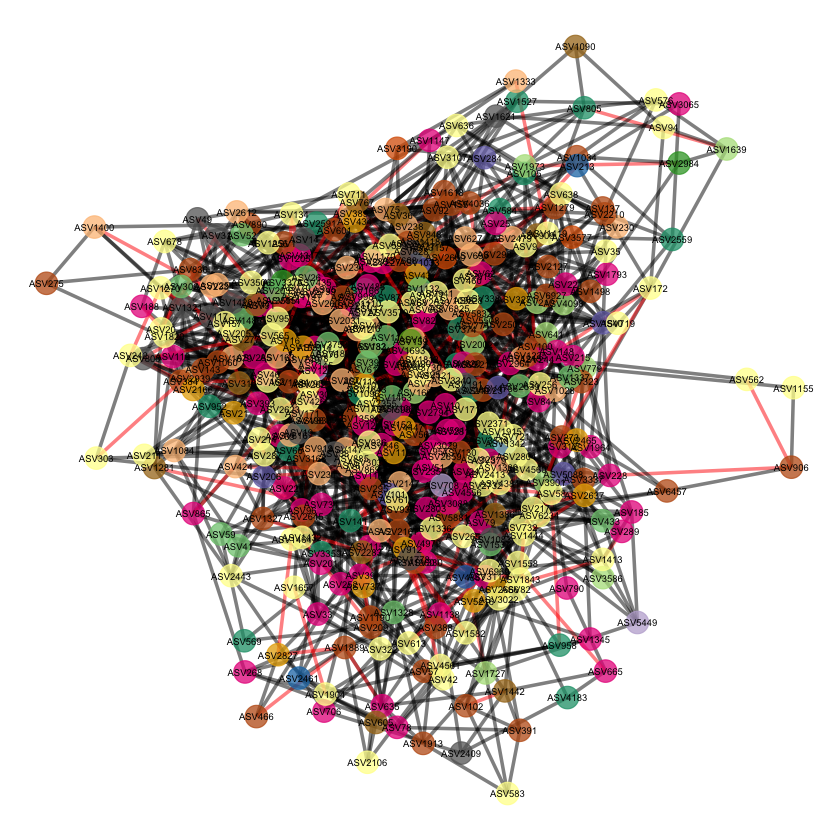

In [22]:
spiec.out <- spiec.easi(ps.dat.HEU.CAPD, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HEU.CAPD)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HEU.CAPD)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HEU.CAPD, type='taxa', color="V5")
grph
pdf("img/network.HEU.CAPD.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)
# visualize network with pos and neg connections
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HEU.CAPD_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HEU.CAPD.txt", format="ncol")

# kcore decomp
which(coreness(spiec.graph)>=2)
which(coreness(spiec.graph)==0)

# eigenvalue centrality
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HEUCAPD <- spiec.graph

#### 4g. HI CA-PE

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  270"

pdf 
  2

[1] "number of positive connections:  771"

[1] "number of negative connections:  41"

[1] "total number of connections:  812"

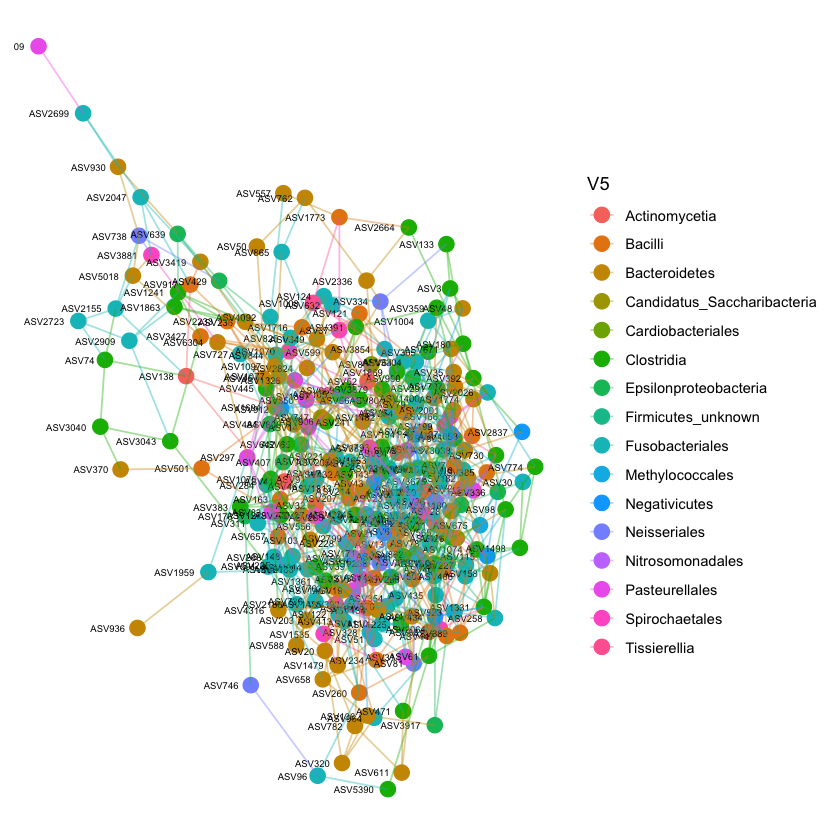

pdf 
  2

ASV1694    ASV8    ASV5   ASV22   ASV72   ASV65   ASV87  ASV105  ASV407  ASV336 
      1       2       3       4       5       6       7       8       9      10 
 ASV429  ASV176  ASV639  ASV990 ASV1180  ASV144  ASV406 ASV3917  ASV484 ASV3881 
     11      12      13      14      15      16      17      18      19      20 
ASV2064  ASV924 ASV1070 ASV1475 ASV1535  ASV166  ASV210   ASV37 ASV1773  ASV180 
     21      22      23      24      25      26      27      28      29      30 
ASV1241  ASV100  ASV365  ASV471   ASV74  ASV130   ASV61  ASV793 ASV3040 ASV2233 
     31      32      33      34      35      36      37      38      39      40 
ASV1167 ASV4092 ASV3675 ASV3854  ASV228 ASV3345  ASV825  ASV435 ASV2155  ASV870 
     41      42      43      44      45      46      47      48      49      50 
 ASV556  ASV393  ASV148 ASV1004  ASV124   ASV79  ASV328   ASV78   ASV62   ASV39 
     51      52      53      54      55      56      57      58      59      60 
  ASV51  ASV311  ASV742   ASV33  ASV400   ASV25   ASV10   ASV30  ASV354  ASV215 
     61      62      63      64      65      66      67      68      69      70 
ASV2186 ASV1653 ASV1482 ASV2050   ASV23  ASV503  ASV347 ASV2026 ASV2183  ASV591 
     71      72      73      74      75      76      77      78      79      80 
ASV1959  ASV285  ASV379   ASV91  ASV413 ASV2047  ASV736   ASV96  ASV227  ASV964 
     81      82      83      84      85      86      87      88      89      90 
 ASV865  ASV488 ASV3304  ASV221  ASV862 ASV2699  ASV258  ASV268  ASV235  ASV844 
     91      92      93      94      95      96      97      98      99     100 
  ASV64 ASV1110 ASV2909 ASV2723  ASV523  ASV188   ASV46  ASV122  ASV727  ASV632 
    101     102     103     104     105     106     107     108     109     110 
ASV2799  ASV861  ASV296  ASV389  ASV171    ASV7    ASV6    ASV2  ASV207 ASV1762 
    111     112     113     114     115     116     117     118     119     120 
ASV3427  ASV447 ASV1716   ASV40  ASV501  ASV163  ASV131  ASV234  ASV385  ASV254 
    121     122     123     124     125     126     127     128     129     130 
 ASV917 ASV1058 ASV1400  ASV147  ASV657  ASV121  ASV270   ASV13  ASV260  ASV906 
    131     132     133     134     135     136     137     138     139     140 
ASV1008  ASV199 ASV1074 ASV1869  ASV432 ASV1361  ASV774 ASV3879 ASV1498  ASV726 
    141     142     143     144     145     146     147     148     149     150 
 ASV383 ASV2664 ASV1863  ASV101  ASV284  ASV969 ASV1279  ASV391   ASV98 ASV1927 
    151     152     153     154     155     156     157     158     159     160 
 ASV445  ASV686   ASV56 ASV1075  ASV414 ASV4014  ASV905 ASV3043 ASV1331    ASV3 
    161     162     163     164     165     166     167     168     169     170 
 ASV392  ASV291  ASV133    ASV1  ASV143  ASV642 ASV5390 ASV1225  ASV359  ASV730 
    171     172     173     174     175     176     177     178     179     180 
ASV1341   ASV16   ASV21   ASV43  ASV912  ASV115  ASV434 ASV2837  ASV107   ASV15 
    181     182     183     184     185     186     187     188     189     190 
  ASV41   ASV32   ASV52   ASV11   ASV88   ASV59  ASV138   ASV34   ASV36  ASV198 
    191     192     193     194     195     196     197     198     199     200 
 ASV334  ASV288  ASV738   ASV81  ASV746 ASV1326  ASV297  ASV350   ASV83  ASV112 
    201     202     203     204     205     206     208     209     210     211 
  ASV38   ASV19   ASV31   ASV14   ASV49   ASV27  ASV675  ASV320 ASV1479   ASV35 
    212     213     214     215     216     217     218     219     220     221 
 ASV557  ASV930  ASV214  ASV658  ASV426  ASV236   ASV20  ASV782  ASV158 ASV1097 
    222     223     225     226     227     228     229     230     231     232 
 ASV565  ASV762  ASV103 ASV1093  ASV134  ASV588  ASV136 ASV5018  ASV241   ASV50 
    233     234     235     236     237     238     239     240     241     242 
ASV2824  ASV203 ASV3419  ASV626  ASV809  ASV611    ASV4   ASV80 ASV2336 ASV4316 
    243     244     245     246

named integer(0)

ASV62     ASV87    ASV969    ASV924     ASV23   ASV3879   ASV2001    ASV144 
0.4515783 0.4552909 0.4837596 0.4846076 0.5743601 0.6308044 0.6477353 0.6764155 
   ASV107   ASV1341 
0.7114974 1.0000000

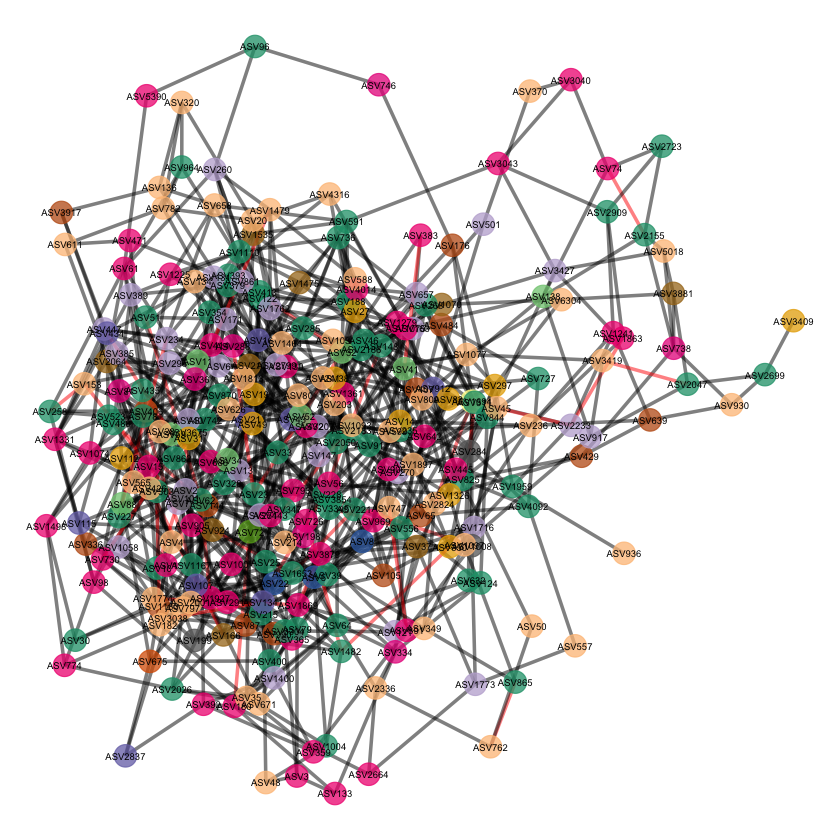

In [23]:
spiec.out <- spiec.easi(ps.dat.HI.CAPE, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HI.CAPE)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HI.CAPE)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HI.CAPE, type='taxa', color="V5")
grph
pdf("img/network.HI.CAPE.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)
# visualize network with pos and neg connections
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HI.CAPE_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HI.CAPE.txt", format="ncol")

# kcore decomp
which(coreness(spiec.graph)>=2)
which(coreness(spiec.graph)==0)

# eigenvalue centrality
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HICAPE <- spiec.graph

#### 4h. HUU CA-PE

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  270"

pdf 
  2

[1] "number of positive connections:  2565"

[1] "number of negative connections:  754"

[1] "total number of connections:  3319"

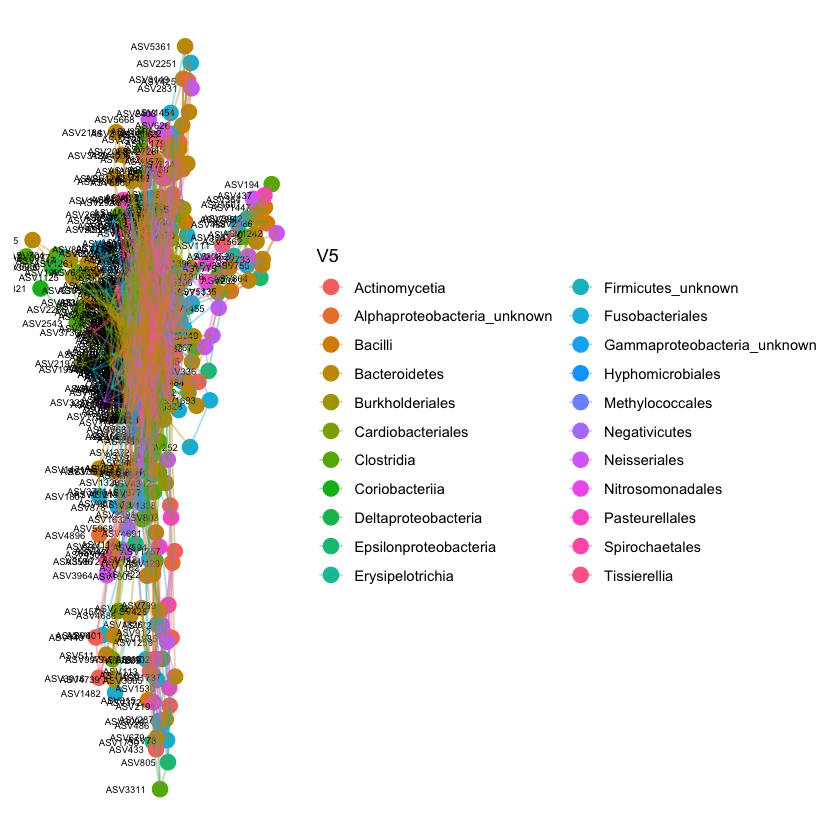

pdf 
  2

ASV129 ASV4896 ASV5073   ASV69  ASV145    ASV8 ASV2391 ASV1133 ASV1788  ASV219 
      1       2       3       4       5       6       7       8       9      10 
   ASV5   ASV72 ASV5902 ASV4059 ASV1591 ASV1547 ASV2037 ASV5203  ASV785   ASV65 
     11      12      13      14      15      16      17      18      19      20 
  ASV87  ASV105 ASV3632 ASV1541  ASV336 ASV1146 ASV1272  ASV547  ASV127 ASV4509 
     21      22      23      24      25      26      27      28      29      30 
 ASV639 ASV3363  ASV536 ASV1912 ASV1065 ASV5290 ASV1730  ASV569  ASV498  ASV374 
     31      32      33      34      35      36      37      38      39      40 
ASV3532  ASV144 ASV2735  ASV564  ASV685 ASV1144 ASV6341  ASV169  ASV261  ASV868 
     41      42      43      44      45      46      47      48      49      50 
ASV1830 ASV2619  ASV805  ASV587 ASV2227  ASV864 ASV3783 ASV3586 ASV1475  ASV166 
     51      52      53      54      55      56      57      58      59      60 
ASV4566 ASV1140 ASV3736  ASV210  ASV799   ASV37 ASV5579 ASV2934  ASV183  ASV100 
     61      62      63      64      65      66      67      68      69      70 
ASV1884 ASV3358  ASV601  ASV323  ASV704   ASV92   ASV61  ASV514 ASV1371  ASV997 
     71      72      73      74      75      76      77      78      79      80 
 ASV369 ASV2535 ASV3854  ASV734  ASV435 ASV2974 ASV3857 ASV1622  ASV870  ASV142 
     81      82      83      84      85      86      87      88      89      90 
 ASV393  ASV152 ASV1994 ASV1826  ASV119  ASV148 ASV3065 ASV1004 ASV1858 ASV1701 
     91      92      93      94      95      96      97      98      99     100 
ASV1255  ASV165  ASV253   ASV78   ASV62   ASV51  ASV486  ASV497  ASV517  ASV394 
    101     102     103     104     105     106     107     108     109     110 
 ASV878  ASV313  ASV826   ASV25   ASV10   ASV30  ASV330  ASV185 ASV1807 ASV1138 
    111     112     113     114     115     116     117     118     119     120 
ASV1298 ASV2248 ASV2923  ASV869  ASV354  ASV806  ASV215 ASV1693 ASV1482 ASV1354 
    121     122     123     124     125     126     127     128     129     130 
 ASV705 ASV1102  ASV308   ASV23  ASV503 ASV1347  ASV347 ASV1865 ASV2183  ASV820 
    131     132     133     134     135     136     137     138     139     140 
 ASV591  ASV465 ASV4790  ASV887 ASV1021 ASV2389  ASV252 ASV3094  ASV379   ASV91 
    141     142     143     144     145     146     147     148     149     150 
ASV3405 ASV1286   ASV96  ASV227  ASV488 ASV1035  ASV481  ASV509  ASV258  ASV268 
    151     152     153     154     155     156     157     158     159     160 
 ASV235 ASV3480  ASV280   ASV64 ASV1152 ASV1110 ASV2403  ASV188 ASV2251   ASV46 
    161     162     163     164     165     166     167     168     169     170 
 ASV122 ASV1852  ASV727  ASV790 ASV3077 ASV6319  ASV812  ASV861 ASV1938  ASV296 
    171     172     173     174     175     176     177     178     179     180 
 ASV171 ASV1100    ASV2  ASV207 ASV1740  ASV804 ASV3780 ASV1762 ASV1529 ASV1560 
    181     182     183     184     185     186     187     188     189     190 
ASV3758 ASV5335 ASV5847 ASV3156  ASV891 ASV2986   ASV75  ASV231   ASV40  ASV499 
    191     192     193     194     195     196     197     198     199     200 
 ASV163 ASV4197 ASV3149  ASV190  ASV131 ASV1896  ASV238  ASV815  ASV722  ASV872 
    201     202     203     204     205     206     207     208     209     210 
ASV1084  ASV755 ASV1601 ASV2438 ASV3520 ASV1400 ASV1243 ASV1125 ASV1460 ASV9504 
    211     212     213     214     215     216     217     218     219     220 
ASV1447  ASV147  ASV121 ASV3365  ASV270  ASV616 ASV1477 ASV1505   ASV13 ASV1980 
    221     222     223     224     225     226     227     228     229     230 
ASV4691  ASV260 ASV8091  ASV906 ASV3375 ASV5058 ASV2713 ASV2543 ASV1382 ASV2663 
    231     232     233     234     235     236     237     238     239     240 
ASV1300 ASV3311 ASV1916 ASV2201 ASV1862 ASV3800  ASV774  ASV608 ASV2286  ASV726 
    241     242     243     244 

named integer(0)

ASV936   ASV3375   ASV3365    ASV281     ASV13    ASV369    ASV127     ASV75 
0.5389743 0.5436522 0.5475938 0.5493459 0.5731194 0.5782608 0.7642817 0.8667147 
  ASV2713    ASV379 
0.9191806 1.0000000

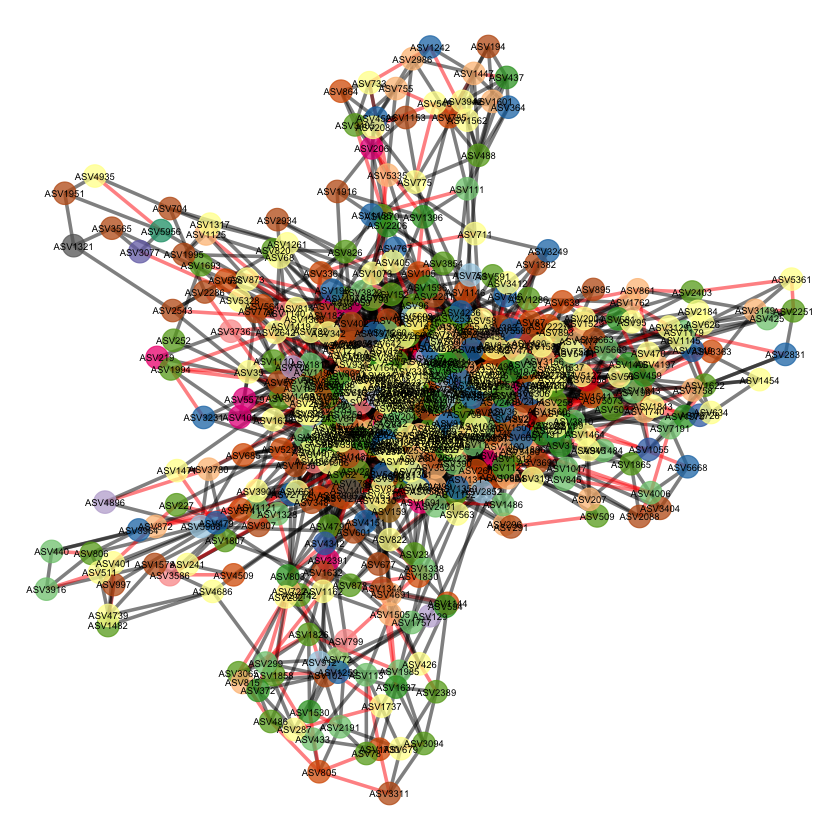

In [24]:
spiec.out <- spiec.easi(ps.dat.HUU.CAPE, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HUU.CAPE)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HUU.CAPD)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HUU.CAPE, type='taxa', color="V5")
grph
pdf("img/network.HUU.CAPE.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)
# visualize network with pos and neg connections
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HUU.CAPE_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HUU.CAPE.txt", format="ncol")

# kcore decomp
which(coreness(spiec.graph)>=2)
which(coreness(spiec.graph)==0)

# eigenvalue centrality
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HUUCAPE <- spiec.graph

#### 4i. HEU CA-PE network

Applying data transformations...

Selecting model with pulsar using stars...

Warning message in pulsar(data = X, fun = match.fun(estFun), fargs = args, rep.num = 100, :
“Optimal lambda may be larger than the supplied values”
Fitting final estimate with mb...

done



[1] "Total number of ASVs in graph:  408"

pdf 
  2

[1] "number of positive connections:  1"

[1] "number of negative connections:  0"

[1] "total number of connections:  1"

ERROR: Error in ggnet2(net, color = getrank, alpha = 0.75, palette = y, size = 6, : incorrect edge.color value


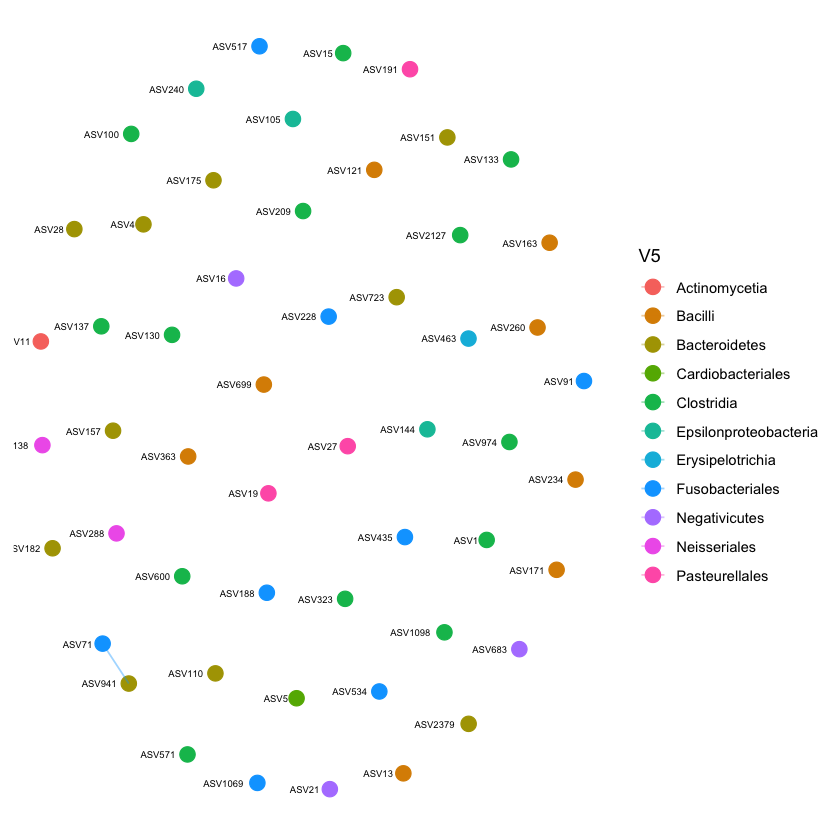

In [25]:
# not enough samples to build this network - not included

spiec.out <- spiec.easi(ps.dat.HEU.CAPE, method="mb", lambda.min.ratio=1e-2, nlambda=20, pulsar.params=list(rep.num=100))
spiec.graph <- adj2igraph(getRefit(spiec.out), vertex.attr=list(name=taxa_names(ps.dat.HEU.CAPE)))
paste("Total number of ASVs in graph: ", length(taxa_names(ps.dat.HEU.CAPD)))
# save network
grph <- plot_network(spiec.graph, ps.dat.HEU.CAPE, type='taxa', color="V5")
grph
pdf("img/network.HEU.CAPE.pdf")
grph
dev.off()
#how many positive and negative edges inferred from network?
betaMat <- as.matrix(symBeta(getOptBeta(spiec.out)))
positive <- length(betaMat[betaMat>0])/2
paste("number of positive connections: ", positive)
negative <- length(betaMat[betaMat<0])/2
paste("number of negative connections: ", negative)
total <- length(betaMat[betaMat!=0])/2
paste("total number of connections: ", total)
# visualize network with pos and neg connections
asv.ids <- colnames(spiec.out[[1]]$data)
edges <- E(spiec.graph)
edge_cols <- ifelse(betaMat>0, 'black', 'red')[upper.tri(betaMat) & betaMat!=0]
E(spiec.graph)$color <- edge_cols

#How many nodes connected at specific rank
nb_nodes <- vcount(spiec.graph)
tax_table(ps.dat) <- tax_table(ps.dat)[,getrank]
asv_ids <- V(spiec.graph)$name
idx <- which(row.names(tax_table(ps.dat)) %in% asv_ids)
taxa <- as.character(tax_table(ps.dat)[,getrank])[idx]
ig2 <- asNetwork(spiec.graph)
network.vertex.names(ig2) <- taxa
net <- ig2
net %v% getrank <- as.character(taxa)
y <- col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

#Plot the network
grph <- ggnet2(net, color = getrank, alpha=0.75, palette = y, size = 6, edge.size=1, edge.color="color", edge.alpha = 0.5, label = asv_ids, label.size = 2) +theme(legend.position = "none")
grph
pdf("img/network.HEU.CAPE_posneg.pdf")
grph
dev.off()

#write spiec-easi graph to file 
write.graph(spiec.graph, file="spieceasi.ncol.HEU.CAPE.txt", format="ncol")

# kcore decomp
which(coreness(spiec.graph)>=2)
which(coreness(spiec.graph)==0)

# eigenvalue centrality
tail(sort(igraph::eigen_centrality(spiec.graph)$vector), 10)
# save graph
spiec.graph.HEUCAPE <- spiec.graph